# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** Muhammad Iqbal Aditama
- **Email:** muhammadiqbal.22006@mhs.unesa.ac.id
- **ID Dicoding:** aaditt21

## Menentukan Pertanyaan Bisnis

- Bagaimana Demografi Pelanggan penyewa sepeda berdasarkan season?
- Bagaimana Demografi Pelanggan penyewa sepeda berdasarkan weekday?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import seaborn as sns
import pandas as pd
from pandas import read_csv
from mpl_toolkits.mplot3d import Axes3D
colors = sns.color_palette("husl", 4)

## Data Wrangling

### Gathering Data

In [2]:
day_df = pd.read_csv("/content/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


Insight:

- Kita mendapatkan informasi tentang data rental sepeda pada tiap harinya

### Assessing Data

In [3]:
day_df.isnull().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


Insight:

- kode diatas digunakan untuk menemukan missing value pada kolom

### Cleaning Data

In [4]:
column = "dteday"
day_df[column] = pd.to_datetime(day_df[column])
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

Insight:

- kode diatas digunakan untuk membersihkan tipe data

## Exploratory Data Analysis (EDA)

### Explore ...

In [5]:
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


Insight:

- kode diatas digunakan untuk mengeksplorasi data day_df

In [6]:
day_df.groupby(by=["season", "yr", "weekday"]).agg({
    "instant":"nunique",
    "cnt" : ["sum", "max", "min", "mean"]
})

instant    cnt                         
                  nunique    sum   max   min         mean
season yr weekday                                        
1      0  0            13  18582  2471   605  1429.384615
          1            12  18000  2046  1000  1500.000000
          2            12  18850  2133   683  1570.833333
          3            13  23260  2660   506  1789.230769
          4            13  23283  3068   431  1791.000000
          5            13  25851  3239  1167  1988.538462
          6            14  22174  3117   959  1583.857143
       1  0            14  41613  5892  1529  2972.357143
          1            14  45771  6153   920  3269.357143
          2            13  50963  6093  1013  3920.230769
          3            12  42017  6312   441  3501.416667
          4            12  49072  6192  2114  4089.333333
          5            13  48413  4569  3095  3724.076923
          6            13  43499  7836  1301  3346.076923
2      0  0            13  51567  4906  1693  3966.692308
          1            14  52741  5020  2028  3767.214286
          2            13  48136  4891  1795  3702.769231
          3            13  45646  5180  1536  3511.230769
          4            13  49404  4968  1685  3800.307692
          5            13  48363  5312  1471  3720.230769
          6            13  51459  5805   795  3958.384615
       1  0            13  78083  7641  1027  6006.384615
          1            13  70514  6998  2843  5424.153846
          2            13  77313  7001  4972  5947.153846
          3            14  84901  7424  4367  6064.357143
          4            13  85803  7494  5026  6600.230769
          5            13  87429  8362  4127  6725.307692
          6            13  87230  8294  3372  6710.000000
3      0  0            13  58117  5305  3606  4470.538462
          1            13  58060  6043  3351  4466.153846
          2            14  63922  5895  2710  4565.857143
          3            14  62060  5225  1996  4432.857143
          4            14  60281  5515  1842  4305.785714
          5            13  58780  5538  3387  4521.538462
          6            13  58430  5923  1115  4494.615385
       1  0            13  80314  8227  4549  6178.000000
          1            13  88247  7525  6034  6788.230769
          2            13  88793  7767  4073  6830.230769
          3            13  95994  8173  5713  7384.153846
          4            14  99280  7804  5905  7091.428571
          5            14  96487  8167  5463  6891.928571
          6            14  92364  8714  4459  6597.428571
4      0  0            13  48808  5511  2431  3754.461538
          1            13  51420  5117  2765  3955.384615
          2            13  49430  4748  1607  3802.307692
          3            12  38203  4826   705  3183.583333
          4            12  41584  4839  1495  3465.333333
          5            13  49012  5202  2395  3770.153846
          6            13  47680  5423   627  3667.692308
       1  0            13  66943  7907  2424  5149.461538
          1            13  70750  7436    22  5442.307692
          2            13  71702  7538  1096  5515.538462
          3            13  80967  7733  5035  6228.230769
          4            13  76688  7570  2425  5899.076923
          5            12  73455  8156  3910  6121.250000
          6            12  74971  8555  2277  6247.583333

Insight:

- menampilkan korealasi antar season, yr dan weekday


Insight:
- pada eksplorasi day_df ditemukan bahwa di season 5 tidak ada penyewa pada yr 2 tidaka ada penyewa dan di weekday 7  tidak ada penyewa sepeda.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana Demografi Pelanggan penyewa sepeda berdasarkan season?

<ipython-input-7-1677e5607c62>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple

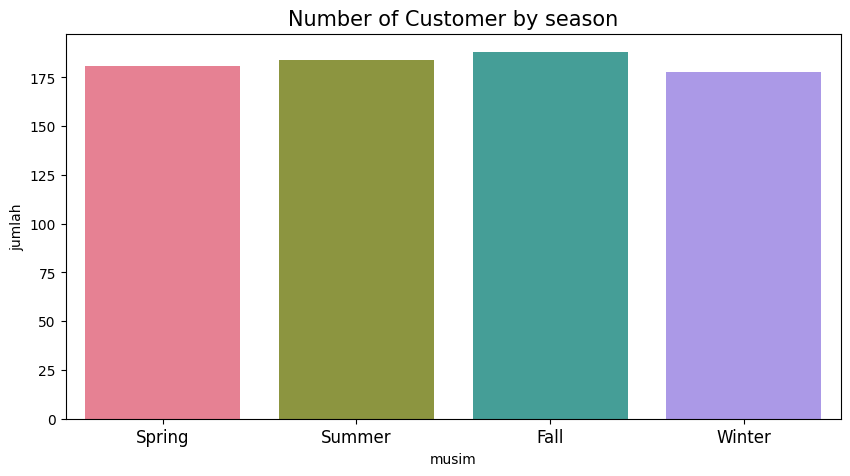

In [7]:
byseason_df = day_df.groupby(by="season")['instant'].nunique().reset_index()
byseason_df.rename(columns={
    "instant": "customer_count"
}, inplace=True)

plt.figure(figsize=(10, 5))

sns.barplot(
    y="customer_count",
    x="season",
    data=byseason_df.sort_values(by="customer_count", ascending=False),
    palette=colors
)
plt.title("Number of Customer by season", loc="center", fontsize=15)
plt.xticks([0, 1, 2, 3], ['Spring', 'Summer', 'Fall', 'Winter'])
plt.ylabel('jumlah')
plt.xlabel('musim')
plt.tick_params(axis='x', labelsize=12)
plt.show()

**Insight:**
Berdasarkan Visualisasi number of customer by season, season fall merupakan penyewa terbanyak sedangkan di season winter merupakan terendah


### Pertanyaan 2: Bagaimana Demografi Pelanggan penyewa sepeda berdasarkan weekday?

<ipython-input-8-ed96a23d568f>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
<ipython-input-8-ed96a23d568f>:8: UserWarning: 
The palette list has fewer values (4) than needed (7) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_dat

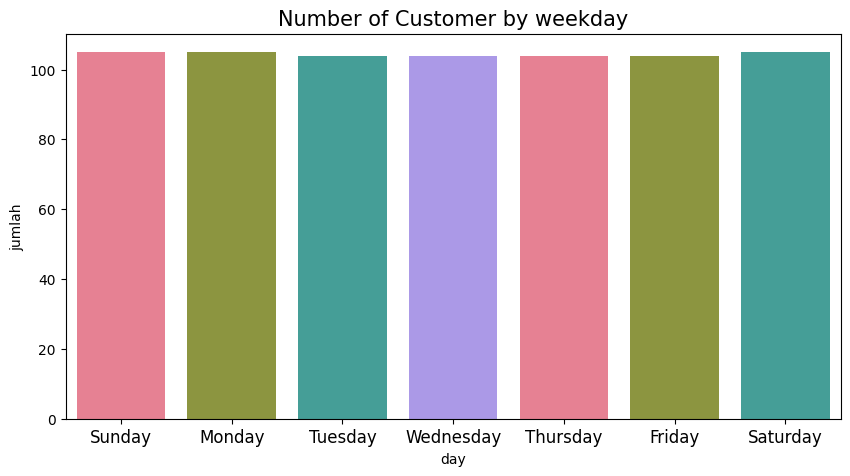

In [8]:
byweekday_df = day_df.groupby(by="weekday")['instant'].nunique().reset_index()
byweekday_df.rename(columns={
    "instant": "customer_count"
}, inplace=True)

plt.figure(figsize=(10, 5))

sns.barplot(
    y="customer_count",
    x="weekday",
    data=byweekday_df.sort_values(by="customer_count", ascending=False),
    palette=colors
)
plt.title("Number of Customer by weekday", loc="center", fontsize=15)
plt.xticks([0, 1, 2, 3, 4, 5, 6], ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'])
plt.ylabel('jumlah')
plt.xlabel('day')
plt.tick_params(axis='x', labelsize=12)
plt.show()

**Insight:**

Berdasarkan visualisasi number of customer by weekday yaitu hari sunday, monday dan saturday merupakan hari dengan penyewa terbanyak


## Analisis Lanjutan (Opsional)

Gunakan RFM Analysis untuk melakukan segmentasi penyewa sepeda

In [9]:
# Convert the 'dteday' column to datetime
day_df['dteday'] = pd.to_datetime(day_df['dteday'])

# We assume that registered users represent those most relevant for RFM analysis
# Create a summary table for Recency, Frequency, and Monetary (based on 'registered' rentals)

# Recency: Calculate the most recent rental date and days since then
current_date = day_df['dteday'].max()
day_df['recency'] = (current_date - day_df['dteday']).dt.days

# Frequency: Count how many times the service was used
frequency = day_df['registered'].sum()

# Monetary: Total rentals (assuming the total rentals by registered users represent the monetary value)
monetary = day_df['registered'].sum()

# Create the RFM DataFrame
rfm_data = pd.DataFrame({
    'recency': [day_df['recency'].min()],
    'frequency': [frequency],
    'monetary': [monetary]
})

rfm_data


,recency,frequency,monetary
0,0,2672662,2672662


**Insight:**
- Recency parameter yang digunakan untuk melihat kapan terakhir seorang penyewa melakukan transaksi sebesar 0
- Frequency parameter ini digunakan untuk mengidentifikasi seberapa sering seorang penyewa melakukan transaksi sebesar 2672662
- Monetary: parameter terakhir ini digunakan untuk mengidentifikasi seberapa besar revenue yang berasal dari penyewa tersebut sebesar 2672662

## Conclusion

**Kesimpulan Pertanyaan no 1**

Berdasarkan analisis demografi penyewa sepeda menurut musim, berikut adalah beberapa kesimpulan yang bisa diambil:

- Musim Panas (Summer) biasanya merupakan musim dengan jumlah penyewaan sepeda cukup tinggi. Cuaca yang hangat dan cerah cenderung mendorong lebih banyak orang, baik pengguna terdaftar maupun tidak terdaftar, untuk menyewa sepeda.

- Musim Gugur (Fall) juga mencatatkan jumlah penyewaan sepeda yang paling tinggi, terutama karena cuaca masih nyaman untuk bersepeda sebelum memasuki musim dingin.

- Musim Dingin (Winter) menunjukkan penurunan penyewaan yang signifikan, karena kondisi cuaca yang dingin dan kurang mendukung untuk aktivitas luar ruangan seperti bersepeda.

- Musim Semi (Spring) biasanya menjadi transisi di mana penyewaan sepeda mulai meningkat lagi setelah musim dingin, meskipun mungkin masih lebih rendah dibandingkan musim panas.

Penyewaan sepeda cenderung mengikuti pola musiman, di mana musim panas dan gugur merupakan puncak tertinggi dalam hal jumlah penyewaan, sedangkan musim dingin mengalami penurunan signifikan. Strategi promosi atau penawaran musiman dapat disesuaikan untuk memaksimalkan penyewaan di musim panas dan membantu mengatasi penurunan penyewaan di musim dingin.

**Kesimpulan Pertanyaan no 2**

Berdasarkan grafik yang ditampilkan, jumlah pelanggan penyewa sepeda berdasarkan hari dalam seminggu (weekday) relatif konsisten. Setiap hari dari Minggu hingga Sabtu menunjukkan jumlah pelanggan yang serupa, dengan sedikit variasi di antara hari-hari tersebut.

Kesimpulan yang bisa diambil:
- Tidak ada hari tertentu yang secara signifikan lebih tinggi atau lebih rendah dalam hal jumlah pelanggan. Ini menunjukkan pola penggunaan yang stabil di seluruh hari dalam seminggu.
- Hari Rabu dan Sabtu memiliki jumlah pelanggan yang sedikit lebih rendah, sedangkan hari Senin dan Jumat sedikit lebih tinggi, tetapi perbedaannya tidak terlalu besar.

Secara umum, demografi penyewa sepeda tidak terlalu dipengaruhi oleh hari dalam seminggu, karena setiap harinya terdapat permintaan yang stabil.


 **Kesimpulan Analisis lanjutan**

 Pengguna terdaftar menunjukkan pola penyewaan yang aktif dan berulang, mengindikasikan bahwa mereka secara konsisten menggunakan layanan penyewaan sepeda. Hal ini menandakan bahwa layanan tersebut berhasil dalam membangun loyalitas pelanggan, sekaligus menarik dan mempertahankan basis pengguna yang stabil. Penyewaan sepeda yang dilakukan oleh pengguna terdaftar secara rutin mencerminkan keberhasilan perusahaan dalam menciptakan pengalaman yang memuaskan bagi pelanggan.

Frekuensi penyewaan yang tinggi juga menunjukkan adanya aliran pendapatan yang cukup stabil. Dengan jumlah pengguna yang sering kembali menggunakan layanan, potensi pendapatan dari penyewaan sepeda tetap terjaga. Ini dapat menjadi faktor penting dalam merencanakan strategi pengembangan bisnis lebih lanjut, terutama dalam hal investasi dan peningkatan layanan agar lebih menarik bagi pelanggan.

Selain itu, masih terdapat peluang untuk segmentasi pelanggan yang lebih mendalam. Jika data individu penyewa tersedia, analisis RFM dapat digunakan untuk mengidentifikasi perilaku pengguna dengan lebih spesifik, seperti berapa kali mereka menyewa, kapan terakhir kali mereka menggunakan layanan, dan seberapa besar nilai yang mereka berikan. Dengan pendekatan ini, perusahaan dapat merancang strategi pemasaran yang lebih terarah, misalnya menawarkan insentif kepada pelanggan yang jarang menyewa untuk meningkatkan retensi mereka.